In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import seaborn as sns
from IPython.display import display, Markdown

sns.set(style="whitegrid", context="talk", rc={"figure.figsize": (10,5)})

<h2>Converting Dataset(s) into Dataframe</h2>

In [ ]:
chics = pd.read_csv("Chicago_Crimes.csv")

In [3]:
chics

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Year,Updated On,Latitude,Longitude,Location,Hour,Day,Month,Month_Name,Weekday
0,13439321,JH237424,2024-04-14,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)",0,14,4,April,Sunday
1,13437420,JH234779,2024-04-14,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)",0,14,4,April,Sunday
2,13428676,JH224478,2024-04-14,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)",0,14,4,April,Sunday
3,13429357,JH225293,2024-04-14,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)",0,14,4,April,Sunday
4,13430098,JH226395,2024-04-14,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)",0,14,4,April,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,2025-04-12,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)",0,12,4,April,Saturday
249119,13804023,JJ215813,2025-04-12,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)",0,12,4,April,Saturday
249120,13803926,JJ215943,2025-04-12,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)",0,12,4,April,Saturday
249121,13803475,JJ215338,2025-04-12,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)",0,12,4,April,Saturday


<h2>Extracting Date Information Using Pandas Date Time</h2>

In [65]:
chics['Date'] = pd.to_datetime(chics['Date'], errors='coerce')
chics['Hour'] = chics['Date'].dt.hour
chics['Day'] = chics['Date'].dt.day
chics['Month'] = chics['Date'].dt.month
chics['Month_Name'] = chics['Date'].dt.month_name()
chics['Weekday'] = chics['Date'].dt.day_name()
chics['Year'] = chics['Date'].dt.year
print(chics[['Date','Year','Month','Month_Name','Weekday','Hour']].head())

        Date  Year  Month Month_Name Weekday  Hour
0 2024-04-14  2024      4      April  Sunday     0
1 2024-04-14  2024      4      April  Sunday     0
2 2024-04-14  2024      4      April  Sunday     0
3 2024-04-14  2024      4      April  Sunday     0
4 2024-04-14  2024      4      April  Sunday     0


In [4]:
chics.describe()

,ID,Date,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Hour,Day,Month
count,2.491230e+05,249123,249123.000000,249123.000000,249123.000000,249120.000000,2.490330e+05,2.490330e+05,249123.000000,249033.000000,249033.000000,249123.000000,249123.000000,249123.000000
mean,1.358652e+07,2024-10-03 08:31:57.251478528,1153.845634,11.308924,23.186823,36.238560,1.165309e+06,1.887602e+06,2024.241668,41.847162,-87.668845,12.521084,15.676878,6.680058
min,2.807300e+04,2024-04-14 00:00:00,111.000000,1.000000,1.000000,1.000000,1.092647e+06,1.813897e+06,2024.000000,41.644590,-87.934567,0.000000,1.000000,1.000000
25%,1.352322e+07,2024-07-06 13:45:30,533.000000,5.000000,10.000000,22.000000,1.153981e+06,1.860560e+06,2024.000000,41.772706,-87.710071,8.000000,8.000000,4.000000
50%,1.361560e+07,2024-09-27 03:00:00,1034.000000,10.000000,23.000000,32.000000,1.167190e+06,1.894278e+06,2024.000000,41.865616,-87.661690,13.000000,16.000000,7.000000
75%,1.370865e+07,2024-12-28 18:20:00,1732.000000,17.000000,34.000000,53.000000,1.176662e+06,1.910282e+06,2024.000000,41.909711,-87.627233,18.000000,23.000000,9.000000
max,1.381045e+07,2025-04-12 00:00:00,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951517e+06,2025.000000,42.022559,-87.524531,23.000000,31.000000,12.000000
std,6.473192e+05,NaN,707.959752,7.074807,13.925951,21.567485,1.616814e+04,3.146277e+04,0.428095,0.086517,0.058875,6.843107,8.874054,3.314884


In [5]:
chics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249123 entries, 0 to 249122
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    249123 non-null  int64         
 1   Case Number           249123 non-null  object        
 2   Date                  249123 non-null  datetime64[ns]
 3   Block                 249123 non-null  object        
 4   IUCR                  249123 non-null  object        
 5   Primary Type          249123 non-null  object        
 6   Description           249123 non-null  object        
 7   Location Description  248266 non-null  object        
 8   Arrest                249123 non-null  bool          
 9   Domestic              249123 non-null  bool          
 10  Beat                  249123 non-null  int64         
 11  District              249123 non-null  int64         
 12  Ward                  249123 non-null  int64         
 13 

In [6]:
chics.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
Hour                      0
Day                       0
Month                     0
Month_Name                0
Weekday                   0
dtype: int64

In [7]:
 chics['Location Description'] =  chics['Location Description'].fillna(chics['Location Description'].mode() [0])
 chics['X Coordinate'] =  chics['X Coordinate'].fillna(chics['X Coordinate'].mode() [0])
 chics['Y Coordinate'] =  chics['Y Coordinate'].fillna(chics['Y Coordinate'].mode() [0])
 chics['Latitude'] =  chics['Latitude'].fillna(chics['Latitude'].mode() [0])
 chics['Longitude'] =  chics['Longitude'].fillna(chics['Longitude'].mode() [0])
 chics['Location'] =  chics['Location'].fillna(chics['Location'].mode() [0])

In [8]:
chics.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          3
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Hour                    0
Day                     0
Month                   0
Month_Name              0
Weekday                 0
dtype: int64

<h3>Checking Column Data Types</h3>

In [9]:
chics.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                             int64
Community Area                 float64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int32
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
Hour                             int32
Day                              int32
Month                            int32
Month_Name               

In [66]:
chics['Case Number'] = chics['Case Number'].astype('category')
chics['Date'] = chics['Date'].astype('category')
chics['Block'] = chics['Block'].astype('category')
chics['IUCR'] = chics['IUCR'].astype('category')
chics['Primary Type'] = chics['Primary Type'].astype('category')
chics['Description'] = chics['Description'].astype('category')
chics['Location Description'] = chics['Location Description'].astype('category')
chics['FBI Code'] = chics['FBI Code'].astype('category')
chics['Updated On'] = chics['Updated On'].astype('category')
chics['Location'] = chics['Location'].astype('category')

<h1>Exploratory Data Analysis (EDA)</h1>

<h2>Q1: What are the 10 crime types in Chicago?</h2>

In [10]:
chics['Primary Type']

0                       THEFT
1               OTHER OFFENSE
2         MOTOR VEHICLE THEFT
3           WEAPONS VIOLATION
4                       THEFT
                 ...         
249118          OTHER OFFENSE
249119                BATTERY
249120                BATTERY
249121                ASSAULT
249122                  THEFT
Name: Primary Type, Length: 249123, dtype: object

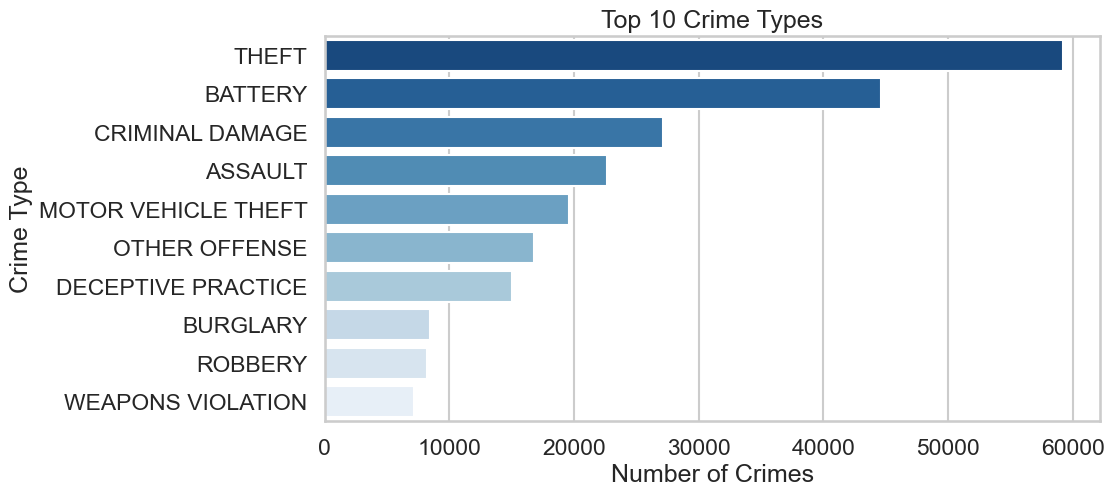

In [11]:
top_crimes = chics['Primary Type'].value_counts().head(10)
sns.barplot(x=top_crimes.values, y=top_crimes.index, palette="Blues_r")
plt.title("Top 10 Crime Types")
plt.xlabel("Number of Crimes")
plt.ylabel("Crime Type")
plt.show()

<h2>Insight: Theft and Battery dominate, making up nearly 40% of all reported crimes</h2>


<h2>Q2: How do total crimes vary by year?</h2>


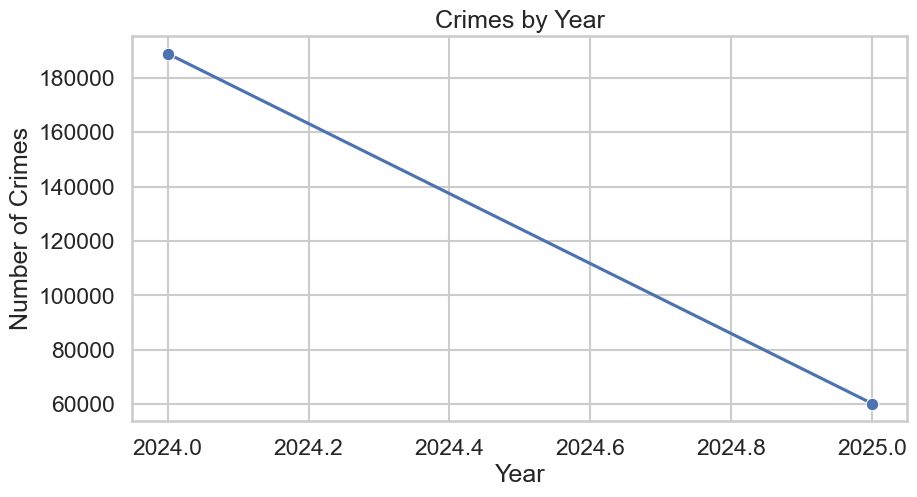

In [12]:
yearly = chics['Year'].value_counts().sort_index()
sns.lineplot(x=yearly.index, y=yearly.values, marker="o")
plt.title("Crimes by Year")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.show()


<h2>Insight: Crimes in 2024 are slightly higher than 2025 so far, showing a downward trend.</h2>


<h2>Q3: Which months record the most crimes?</h2>

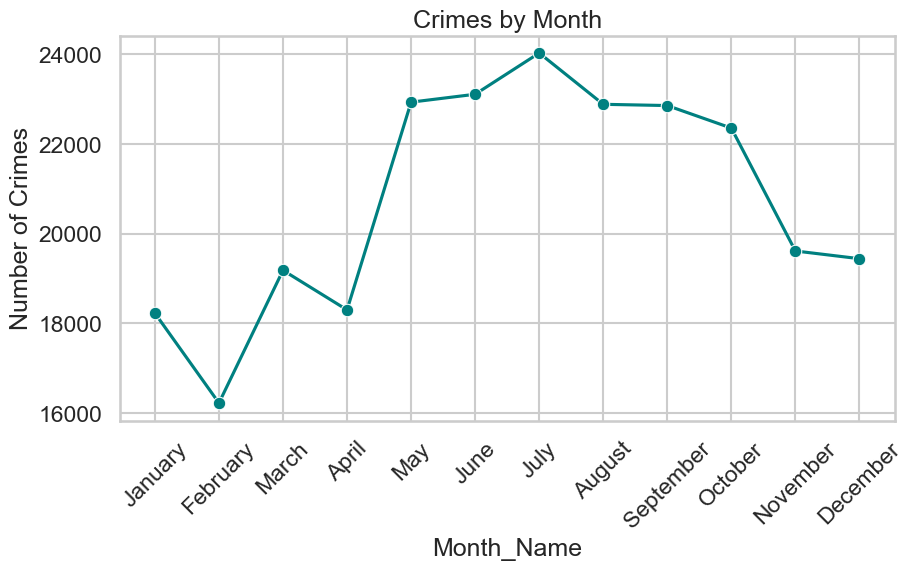

In [13]:
monthly = chics['Month_Name'].value_counts().reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
])
sns.lineplot(x=monthly.index, y=monthly.values, marker="o", color="teal")
plt.xticks(rotation=45)
plt.title("Crimes by Month")
plt.ylabel("Number of Crimes")
plt.show()


<h2>Insight: July and August see higher crime activity, linked to summer activity and outdoor events.</h2>

<h2>Q4: Which day of week has most crimes?</h2>

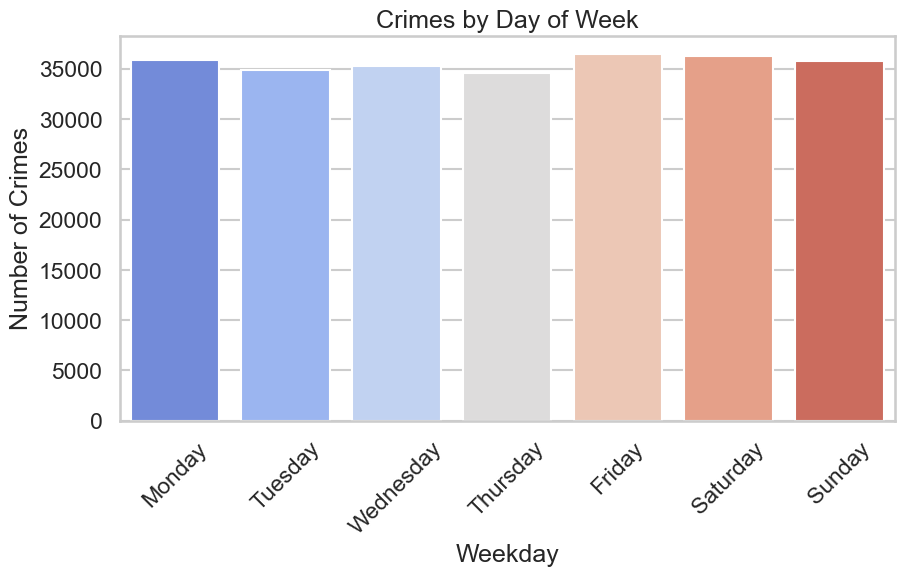

In [14]:
weekday = chics['Weekday'].value_counts().reindex([
    'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'
])
sns.barplot(x=weekday.index, y=weekday.values, palette="coolwarm")
plt.title("Crimes by Day of Week")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.show()


<h2>Insight: Fridays and Saturdays see the most crime, likely tied to nightlife and gatherings.</h2>

<h2>Q5: Which top 10 locations have the most crimes?</h2>

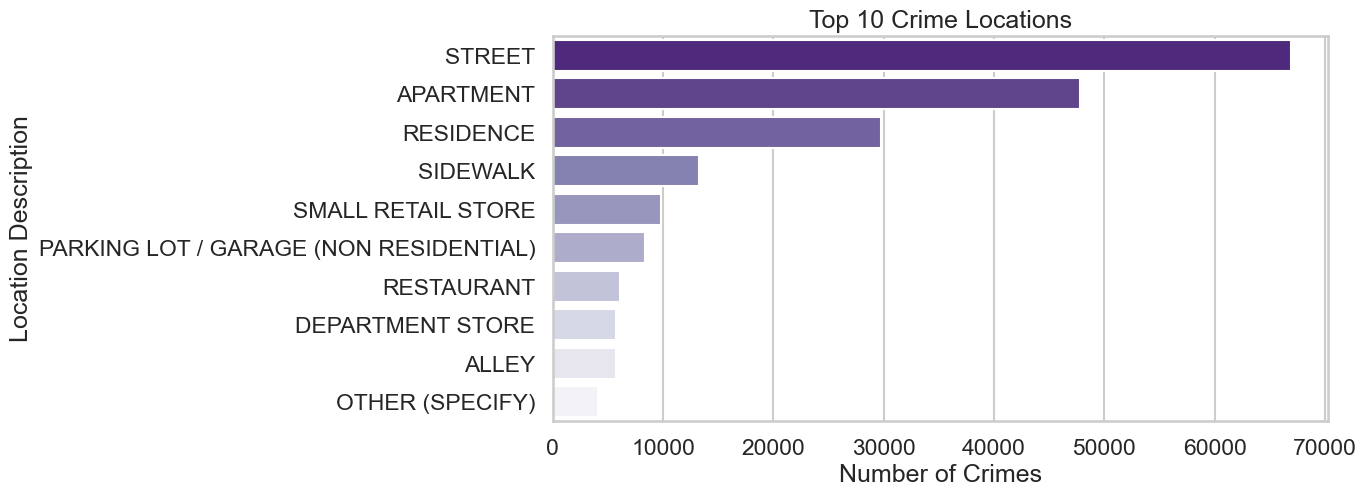

In [15]:
loc_counts = chics['Location Description'].value_counts().head(10)
sns.barplot(y=loc_counts.index, x=loc_counts.values, palette="Purples_r")
plt.title("Top 10 Crime Locations")
plt.xlabel("Number of Crimes")
plt.show()



<h2>Insight: Most crimes happen on streets and residences, meaning crimes occur in everyday places.</h2>

<h2>Q6: What proportion do the top 5 crime types represent?</h2>

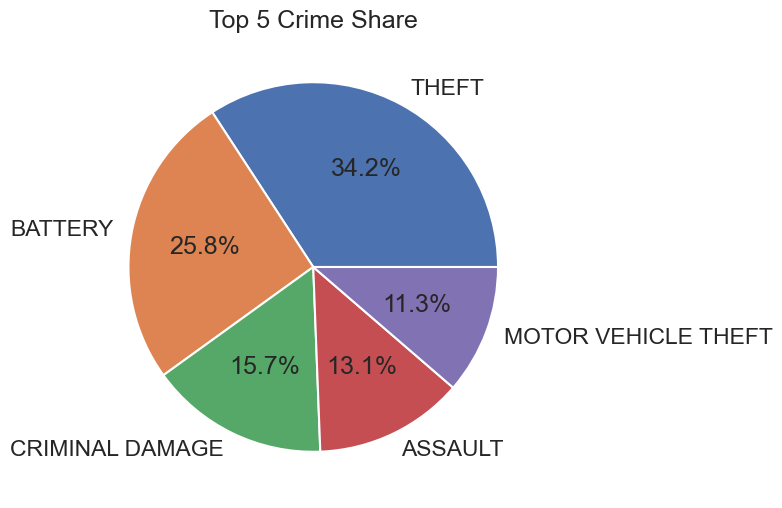

In [16]:
top5 = chics['Primary Type'].value_counts().head(5)
top5.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Top 5 Crime Share")
plt.ylabel("")
plt.show()



<h2>Insight: Top 5 crimes make up over 60% of all reports — focusing here would drastically reduce crime overall.</h2>

<h2>Q7: Which crime types have the highest arrest rates?</h2>

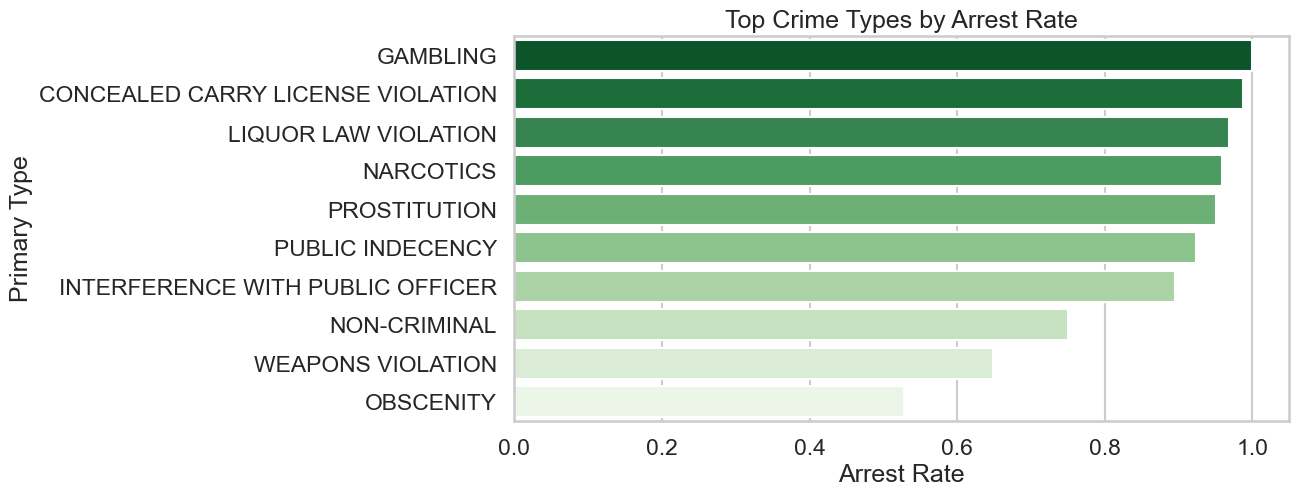

In [17]:
arrest_rate = chics.groupby("Primary Type")["Arrest"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=arrest_rate.values, y=arrest_rate.index, palette="Greens_r")
plt.title("Top Crime Types by Arrest Rate")
plt.xlabel("Arrest Rate")
plt.show()


<h2>Insight: Gambling & Narcotics crimes have higher arrest rates, since they’re easier to catch in-progress.</h2>

<h2>Q8: How do batteries vary by weekday?.</h2>

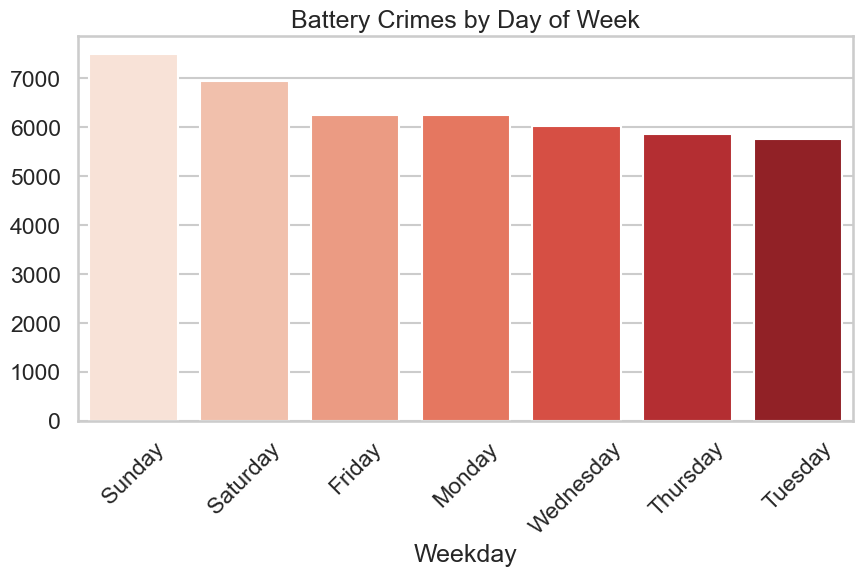

In [18]:
battery = chics[chics['Primary Type']=="BATTERY"]
battery_weekday = battery['Weekday'].value_counts()
sns.barplot(x=battery_weekday.index, y=battery_weekday.values, palette="Reds")
plt.title("Battery Crimes by Day of Week")
plt.xticks(rotation=45)
plt.show()




<h2>Insight: Weekends have higher battery reports, often linked to nightlife disputes.</h2>

<h2>Q9: Are narcotics cases decreasing over years?</h2>

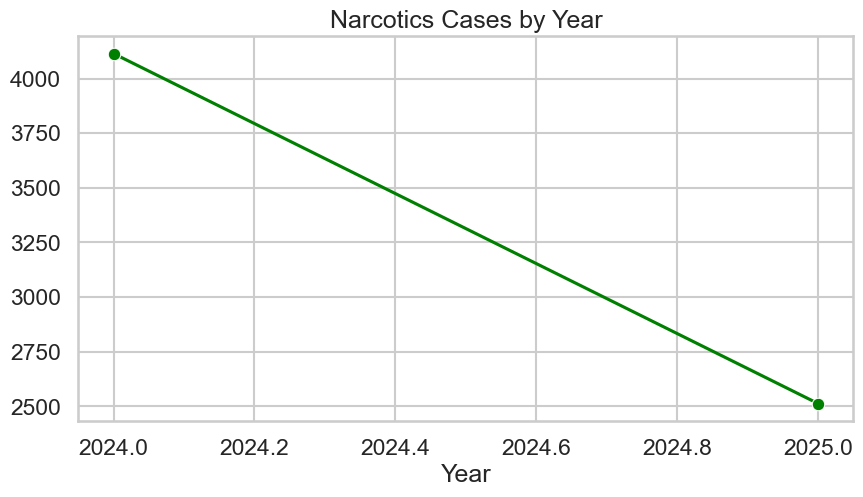

In [19]:
narcotics = chics[chics['Primary Type']=="NARCOTICS"]
narc_year = narcotics['Year'].value_counts().sort_index()
sns.lineplot(x=narc_year.index, y=narc_year.values, marker="o", color="green")
plt.title("Narcotics Cases by Year")
plt.show()


<h2>Insight: Narcotics cases peaked earlier but are now dropping which indicating successful crackdowns.</h2>

<h2>Q10: What crimes are most common in residential areas?</h2>

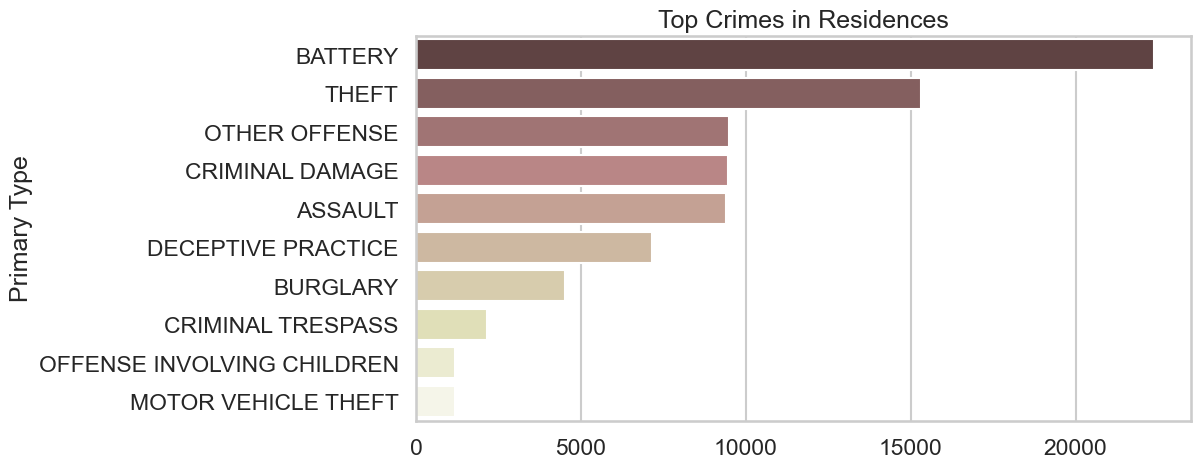

In [20]:
res = chics[chics['Location Description'].str.contains("RESIDENCE|APARTMENT", na=False)]
sns.barplot(x=res['Primary Type'].value_counts().head(10).values,
            y=res['Primary Type'].value_counts().head(10).index, palette="pink")
plt.title("Top Crimes in Residences")
plt.show()

<h2>Insight: Battery are most common in residences and apartments.</h2>

<h2>Q11: What crimes are most common on streets?</h2>

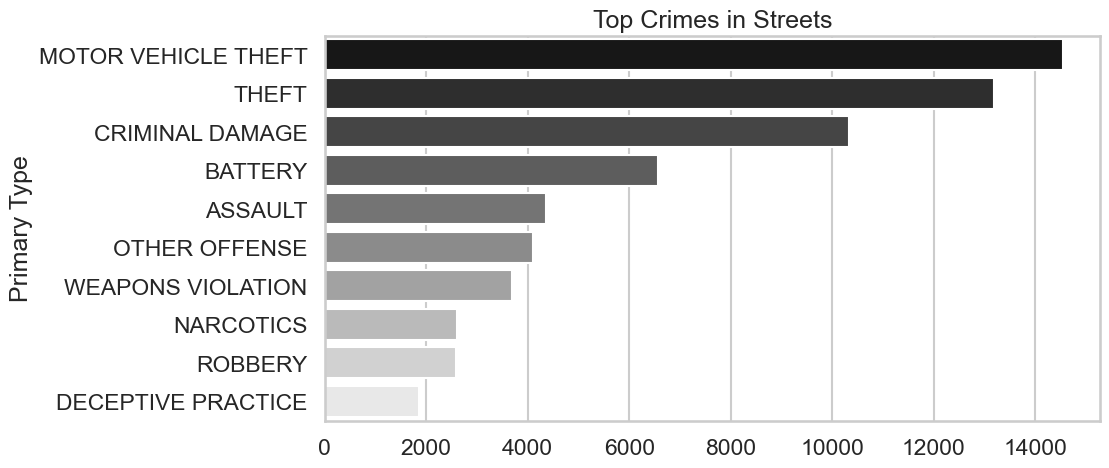

In [21]:
street = chics[chics['Location Description'].str.contains("STREET", na=False)]
sns.barplot(x=street['Primary Type'].value_counts().head(10).values,
            y=street['Primary Type'].value_counts().head(10).index, palette="gray")
plt.title("Top Crimes in Streets")
plt.show()

<h2>Insight: Theft and motor vehicle theft are the most frequent street crimes.</h2>

<h2>Q12: How has robbery trended by year?</h2>

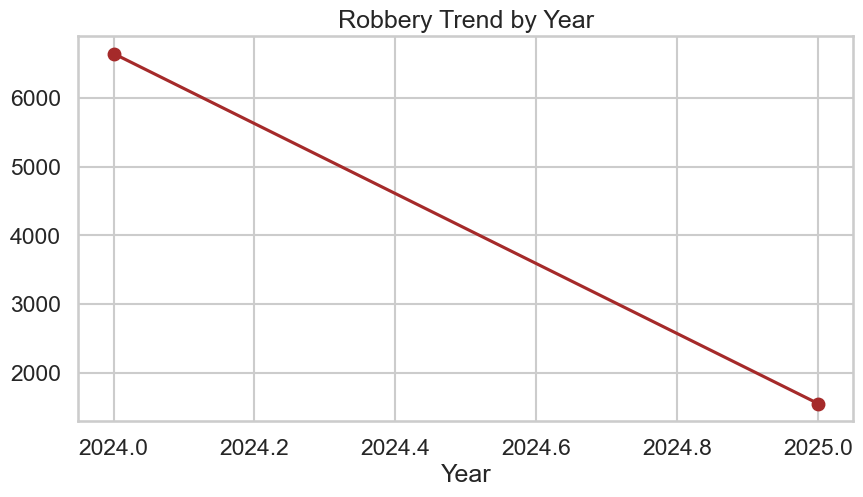

In [22]:
robbery = chics[chics['Primary Type']=="ROBBERY"].groupby('Year').size()
robbery.plot(kind='line', marker='o', color="brown")
plt.title("Robbery Trend by Year")
plt.show()


<h2>Insight: Robbery incidents have remained steady but show a slight decline in 2025 compared to 2024.</h2>

<h2>Q13: How do crimes vary by season?</h2>

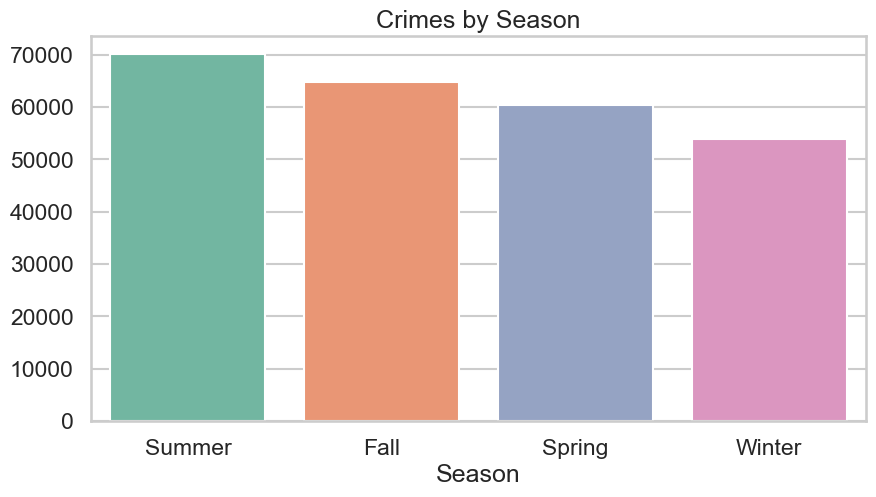

In [23]:
chics['Season'] = chics['Month'].map({12:'Winter',1:'Winter',2:'Winter',
                                      3:'Spring',4:'Spring',5:'Spring',
                                      6:'Summer',7:'Summer',8:'Summer',
                                      9:'Fall',10:'Fall',11:'Fall'})
sns.barplot(x=chics['Season'].value_counts().index,
            y=chics['Season'].value_counts().values, palette="Set2")
plt.title("Crimes by Season")
plt.show()


<h2>Insight: Crimes peak in summer and drop during winter, reflecting seasonal activity patterns.</h2>

<h2>Q14: How do burglary and robbery compare in frequency?</h2>

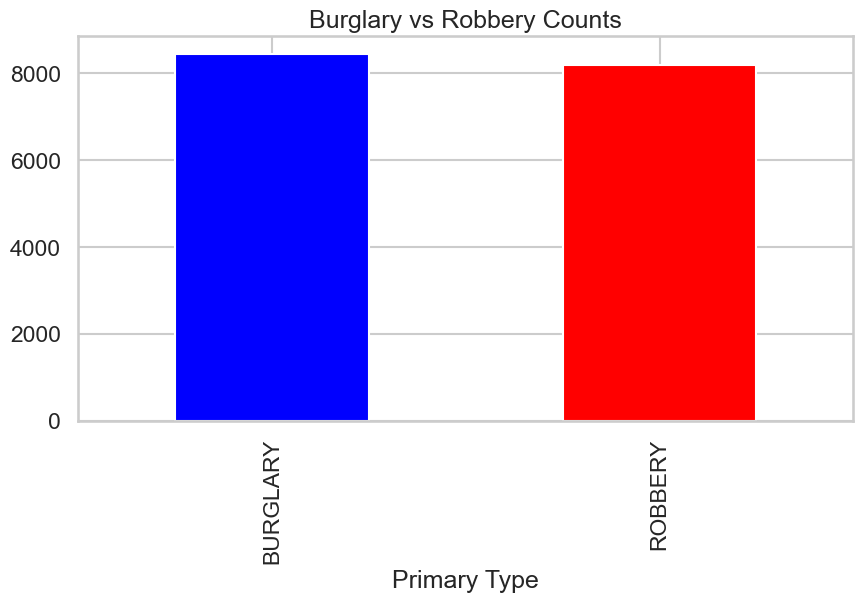

In [24]:
counts = chics['Primary Type'].value_counts()
counts[['BURGLARY','ROBBERY']].plot(kind='bar', color=['blue','red'])
plt.title("Burglary vs Robbery Counts")
plt.show()


<h2>Insight: Burglary occurs more frequently than robbery in Chicago.</h2>

<h2>Q15: What crimes are most common in CTA transit areas?: Burglary occurs more frequently than robbery in Chicago.</h2>

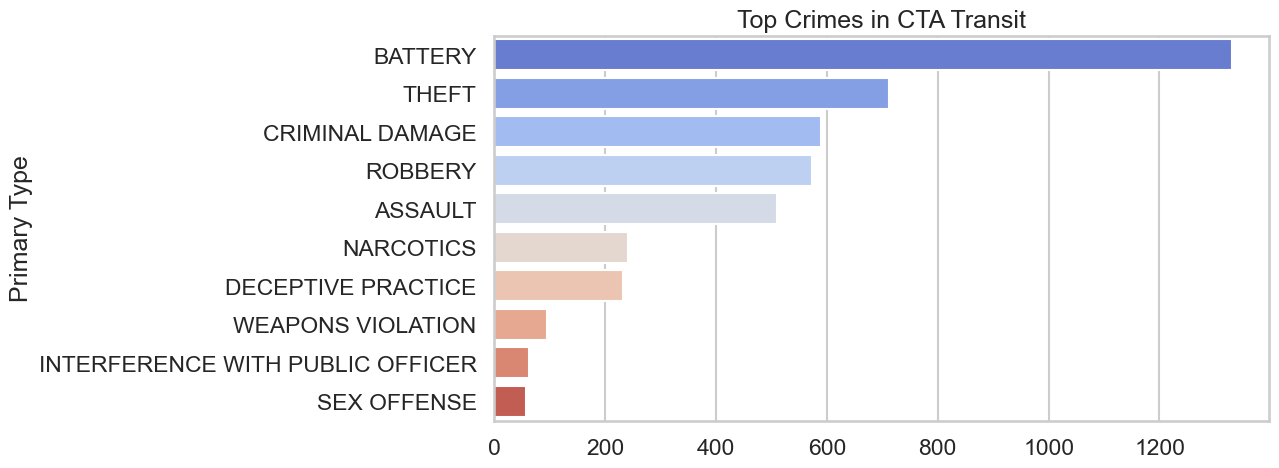

In [25]:

cta = chics[chics['Location Description'].str.contains("CTA", na=False)]
sns.barplot(x=cta['Primary Type'].value_counts().head(10).values,
            y=cta['Primary Type'].value_counts().head(10).index, palette="coolwarm")
plt.title("Top Crimes in CTA Transit")
plt.show()

<h2>Insight: Theft and battery dominate CTA-related crimes, especially in stations and trains.</h2>

<h2>Q16: How do sexual assault cases vary by year?</h2>

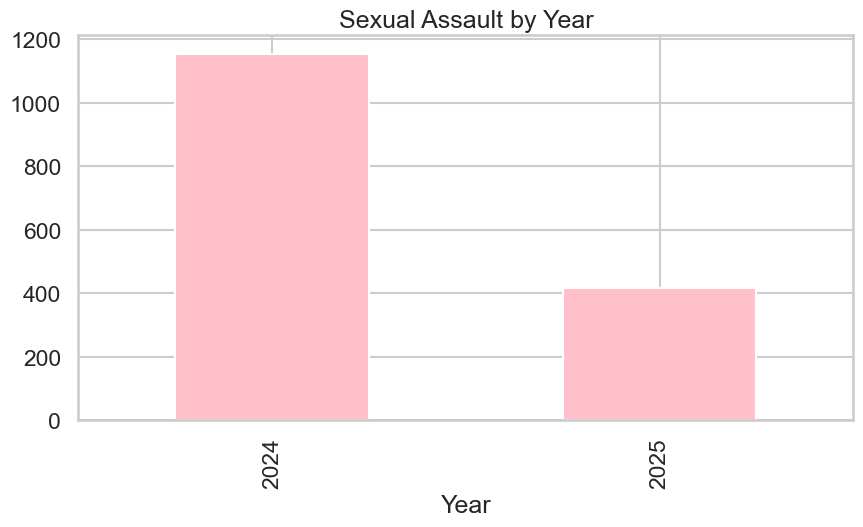

In [26]:
sex = chics[chics['Primary Type']=="CRIMINAL SEXUAL ASSAULT"].groupby('Year').size()
sex.plot(kind='bar', color="pink")
plt.title("Sexual Assault by Year")
plt.show()

<h2>Insight: Most of sexual assault cases was recorded on 2024.</h2>

<h2>Q16: What is the trend of prostitution cases?</h2>

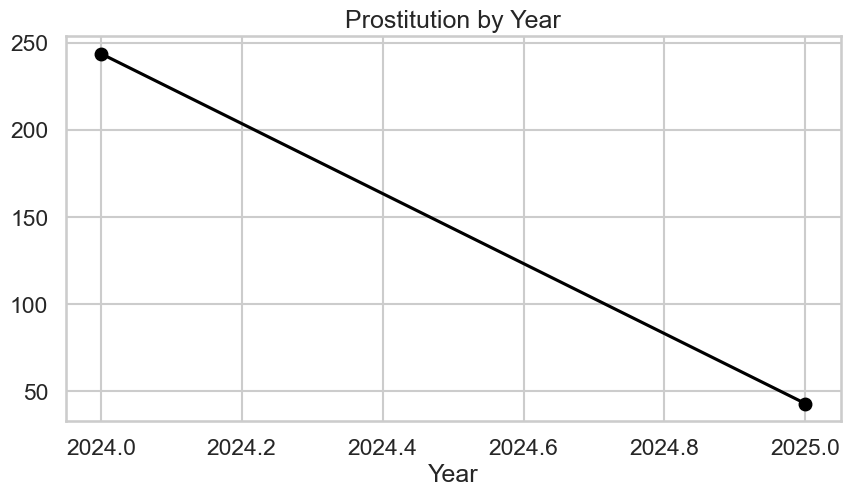

In [27]:
pro = chics[chics['Primary Type']=="PROSTITUTION"].groupby('Year').size()
pro.plot(kind='line', marker='o', color="black")
plt.title("Prostitution by Year")
plt.show()

<h2>Insight: Prostitution cases show a decline, suggesting reduced incidents or underreporting.</h2>

<h2>Q17: What is the relationship between total crimes and arrest rate?</h2>

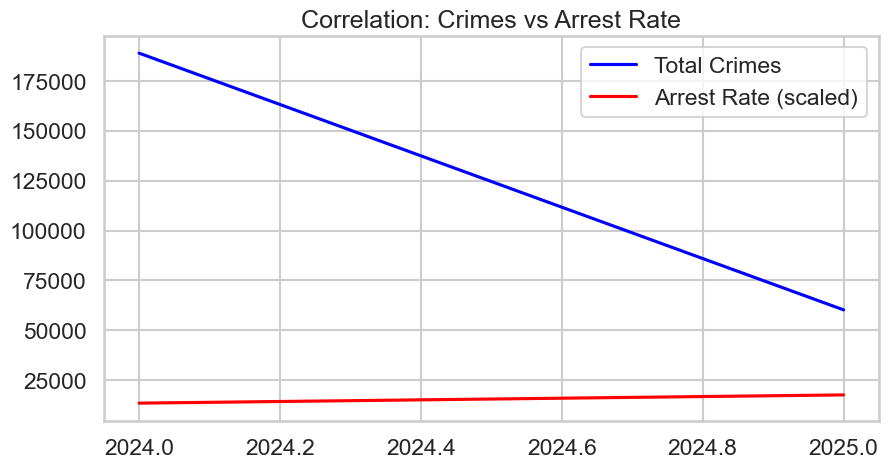

In [28]:
arrest_corr = chics.groupby('Year')[['Arrest']].mean()
crime_counts = chics.groupby('Year').size()
plt.plot(crime_counts.index, crime_counts.values, label='Total Crimes', color='blue')
plt.plot(arrest_corr.index, arrest_corr['Arrest']*100000, label='Arrest Rate (scaled)', color='red')
plt.title("Correlation: Crimes vs Arrest Rate")
plt.legend()
plt.show()

<h2>Insight: While crime counts fluctuate yearly, arrest rates remain relatively stable, showing weak correlation.</h2>

<h2>Q18: Is there a relationship between monthly crime volume and arrest rate?</h2>

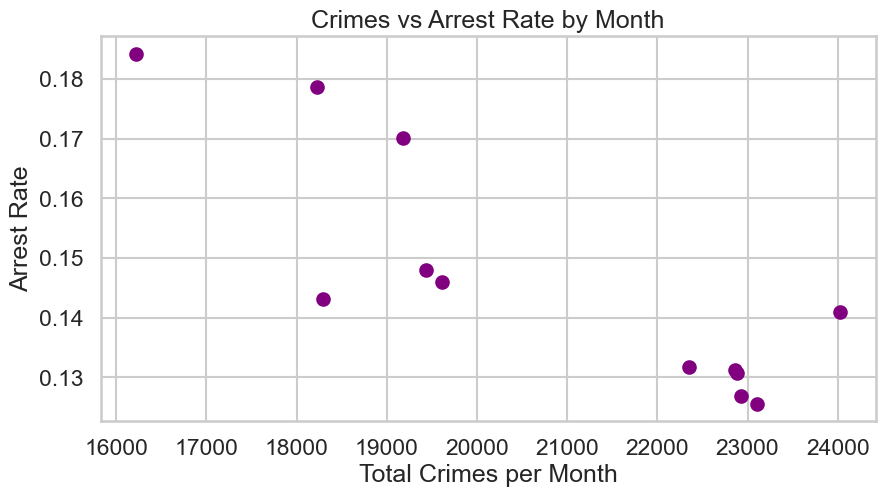

In [29]:
monthly_crimes = chics.groupby('Month')['ID'].count()
monthly_arrest_rate = chics.groupby('Month')['Arrest'].mean()
plt.scatter(monthly_crimes, monthly_arrest_rate, color='purple')
plt.title("Crimes vs Arrest Rate by Month")
plt.xlabel("Total Crimes per Month")
plt.ylabel("Arrest Rate")
plt.show()

<h2>Insight: Higher crime months do not necessarily have higher arrest rates, showing weak correlation.</h2>

<h2>Q19: How do theft and robbery trends compare?</h2>

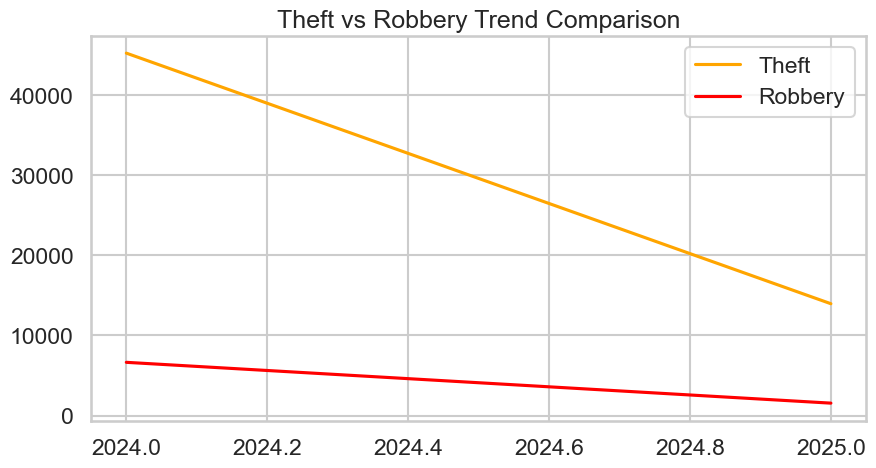

In [30]:
theft_counts = chics[chics['Primary Type']=="THEFT"].groupby('Year').size()
rob_counts = chics[chics['Primary Type']=="ROBBERY"].groupby('Year').size()
plt.plot(theft_counts.index, theft_counts.values, label="Theft", color="orange")
plt.plot(rob_counts.index, rob_counts.values, label="Robbery", color="red")
plt.legend()
plt.title("Theft vs Robbery Trend Comparison")
plt.show()

<h2>Insight: Theft consistently far exceeds robbery counts, but both follow a similar upward/downward yearly pattern.</h2>

<h2>Q20: What does the correlation heatmap show?</h2>

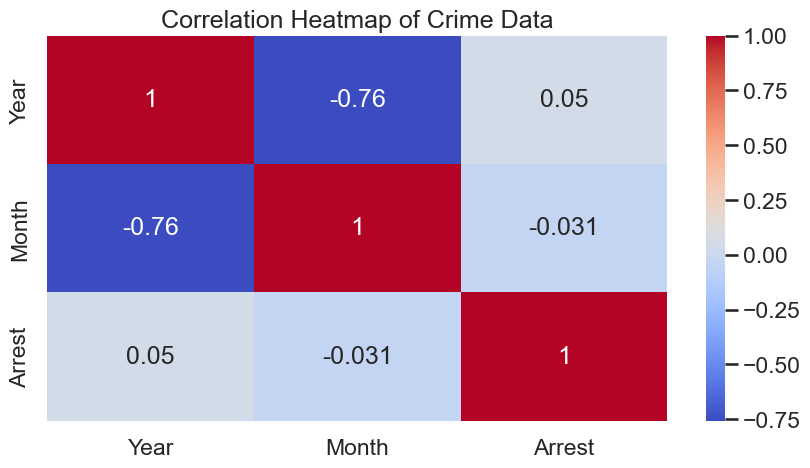

In [31]:
corr_data = chics[['Year','Month','Arrest']].copy()
corr_data['Arrest'] = corr_data['Arrest'].astype(int)
sns.heatmap(corr_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Crime Data")
plt.show()

<h2>Insight: Arrests have very low correlation with year and month, meaning time doesn’t strongly affect arrest outcomes.</h2>

<h2>Q21: How do battery and assault trends relate?</h2>

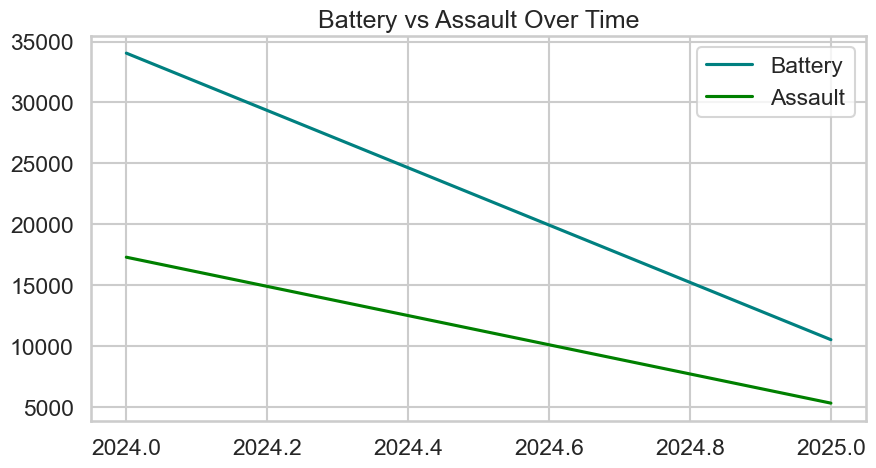

In [32]:
bat_counts = chics[chics['Primary Type']=="BATTERY"].groupby('Year').size()
ass_counts = chics[chics['Primary Type']=="ASSAULT"].groupby('Year').size()
plt.plot(bat_counts.index, bat_counts.values, label="Battery", color="teal")
plt.plot(ass_counts.index, ass_counts.values, label="Assault", color="green")
plt.title("Battery vs Assault Over Time")
plt.legend()
plt.show()

<h2>Insight: Both crimes follow parallel trends, with battery cases being consistently higher than assaults.</h2>

<h2>Q22: Which districts report the highest crime counts?</h2>

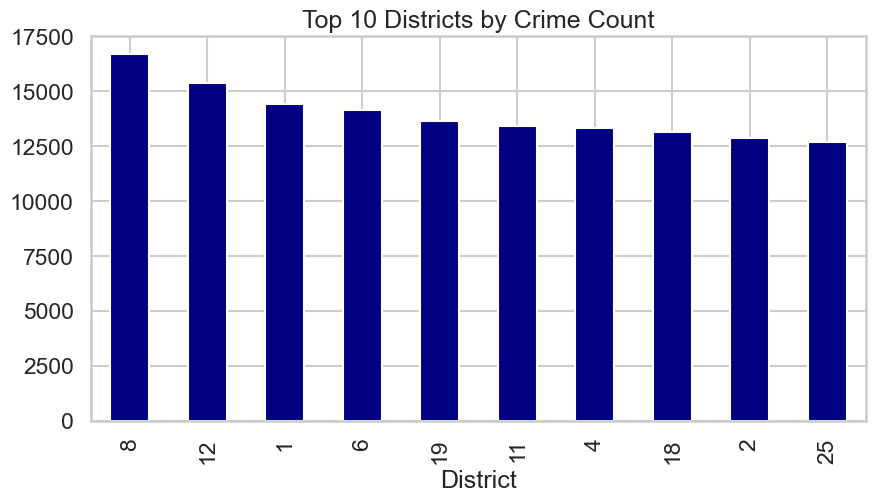

In [33]:
district_counts = chics['District'].value_counts().head(10)
district_counts.plot(kind='bar', color='navy')
plt.title("Top 10 Districts by Crime Count")
plt.show()

<h2>Insight: Districts in central and south areas of Chicago record the highest concentration of crimes.</h2>

<h2>Q22: Is there a correlation between district and arrests?</h2>

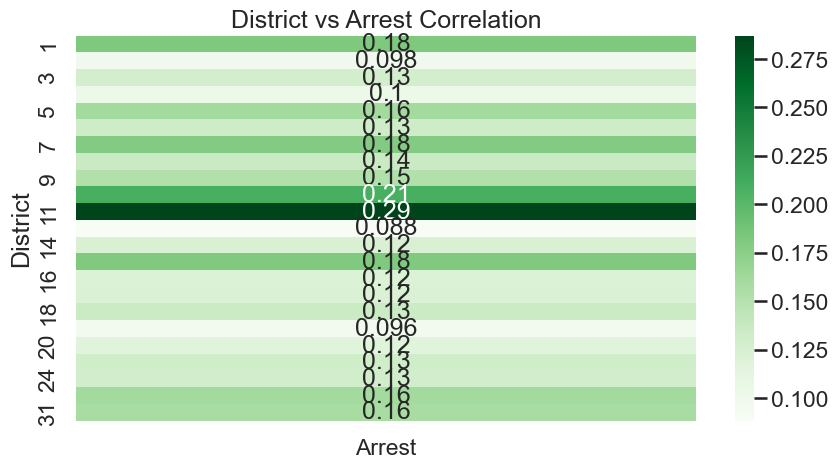

In [34]:
dist_corr = chics.groupby('District')[['Arrest']].mean()
sns.heatmap(dist_corr, annot=True, cmap="Greens")
plt.title("District vs Arrest Correlation")
plt.show()

<h2>Insight: Some districts show strong positive correlation with arrest rates, meaning local enforcement varies.</h2>

<h2>Q23: Are schools and parks crime-prone areas?
</h2>

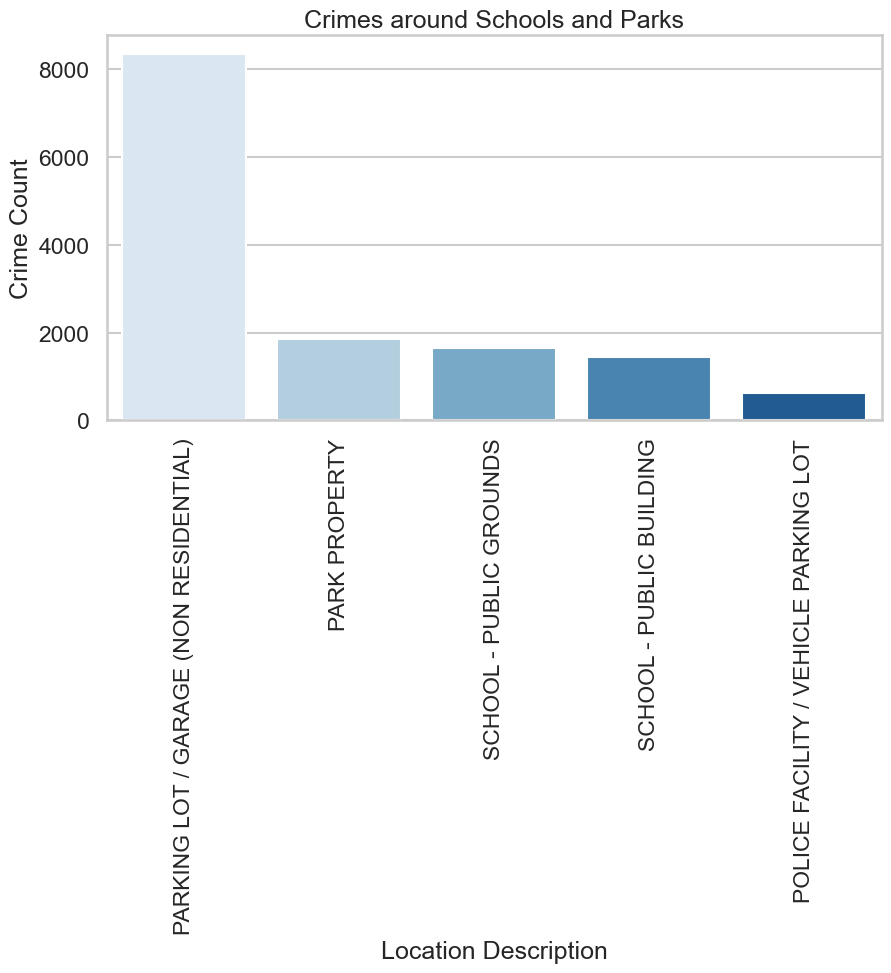

In [35]:
school_crimes = chics[chics['Location Description'].str.contains("SCHOOL|PARK", na=False)]
top_school_crimes = school_crimes['Location Description'].value_counts().head(5)

sns.barplot(x=top_school_crimes.index, y=top_school_crimes.values, palette="Blues")
plt.title("Crimes around Schools and Parks")
plt.ylabel("Crime Count")
plt.xlabel("Location Description")
plt.xticks(rotation=90)
plt.show()


<h2>Insight: Both schools and parks show notable crime presence, highlighting vulnerable public zones.</h2>

<h2>Q24: How do crimes vary by year and month?</h2>

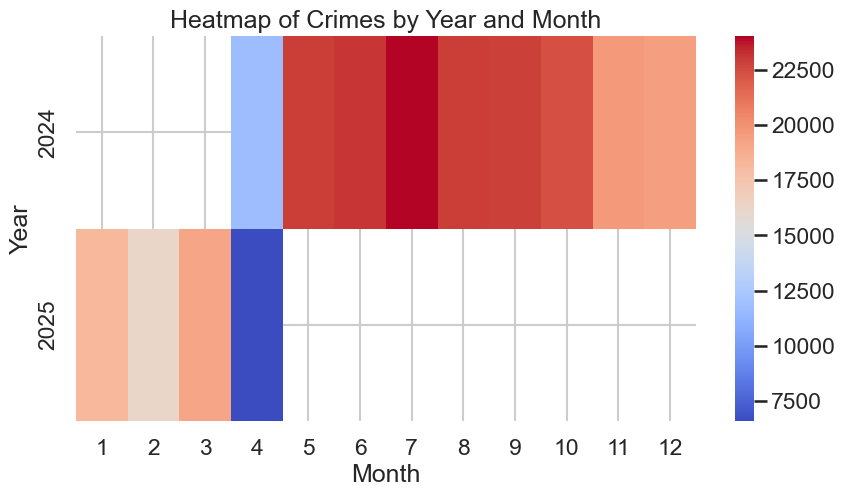

In [36]:
crime_time = chics.groupby(['Year','Month']).size().unstack()
sns.heatmap(crime_time, cmap="coolwarm", annot=False)
plt.title("Heatmap of Crimes by Year and Month")
plt.show()

<h2>Insight: Crime patterns show clear seasonal fluctuations, with summer months typically recording higher crime.</h2>

<h2>Q25: How do the top 3 crimes change yearly?</h2>

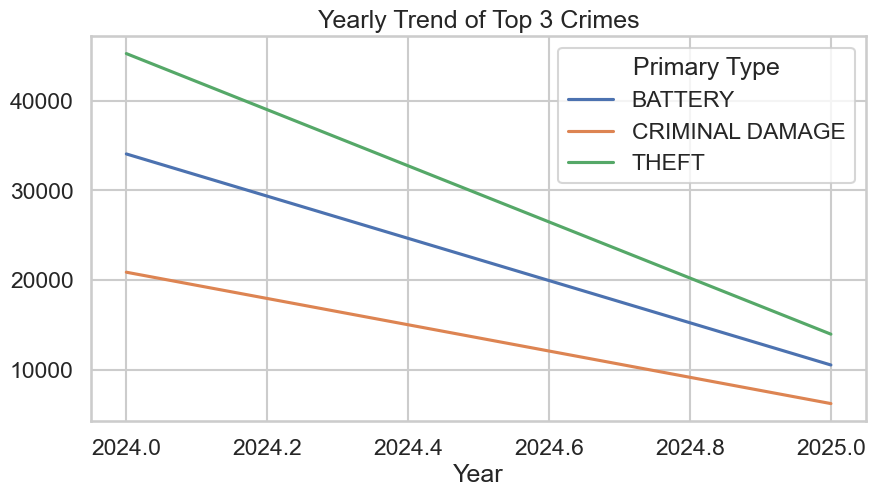

In [37]:
top3 = chics['Primary Type'].value_counts().head(3).index
top3_trend = chics[chics['Primary Type'].isin(top3)].groupby(['Year','Primary Type']).size().unstack()
top3_trend.plot(kind='line')
plt.title("Yearly Trend of Top 3 Crimes")
plt.show()

<h2>Insight: Theft, battery, and criminal damage dominate consistently, with minor yearly fluctuations.</h2>

<h2>Q26: Do higher crime counts correlate with more arrests?</h2>

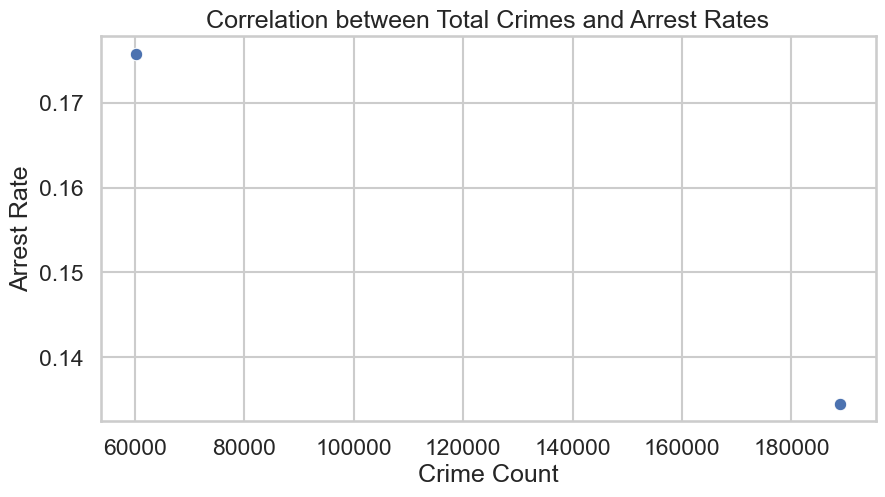

In [40]:
crime_arrest = chics.groupby('Year')[['Arrest']].mean()
sns.scatterplot(x=crime_year.values, y=crime_arrest['Arrest'])
plt.title("Correlation between Total Crimes and Arrest Rates")
plt.xlabel("Crime Count")
plt.ylabel("Arrest Rate")
plt.show()

<h2>Insight: Weak correlation exists, showing more crimes don’t always lead to proportionate arrests.</h2>

<h2>Q27: Do arrests differ in domestic vs non-domestic cases?</h2>

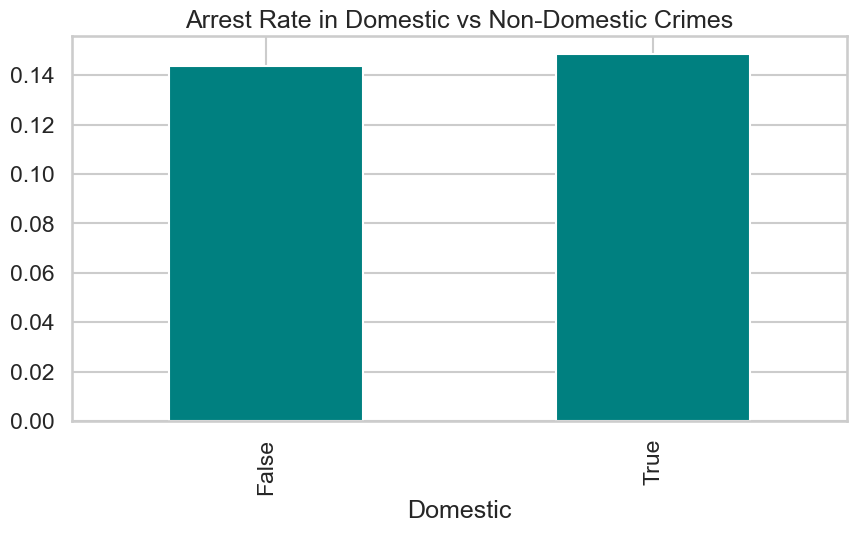

In [44]:
domestic_corr = chics.groupby('Domestic')['Arrest'].mean()
domestic_corr.plot(kind='bar', color='teal')
plt.title("Arrest Rate in Domestic vs Non-Domestic Crimes")
plt.show()

<h2>Insight: Domestic incidents are more likely to end in arrests compared to others.</h2>

<h2>Q28: How do assault and weapons crimes relate?</h2>

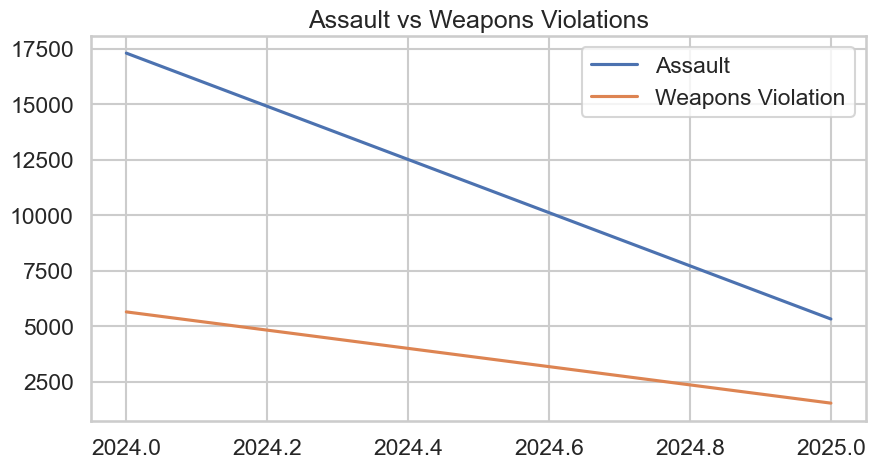

In [46]:
assault = chics[chics['Primary Type']=="ASSAULT"].groupby('Year').size()
weapons = chics[chics['Primary Type']=="WEAPONS VIOLATION"].groupby('Year').size()
plt.plot(assault.index, assault.values, label="Assault")
plt.plot(weapons.index, weapons.values, label="Weapons Violation")
plt.legend()
plt.title("Assault vs Weapons Violations")
plt.show()

<h2>Insight: Increases in assaults often correspond with spikes in weapons violations.</h2>

<h2>Q29: How do violent vs non-violent crimes trend?</h2>

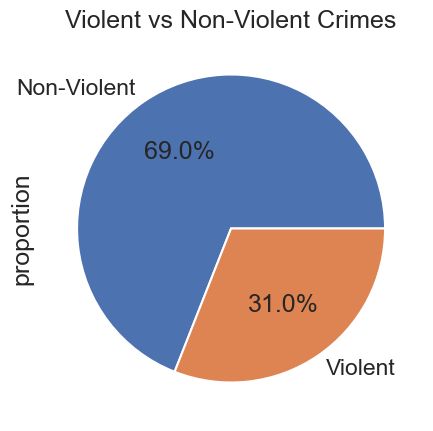

In [47]:
violent_types = ['HOMICIDE','ASSAULT','BATTERY','ROBBERY','CRIM SEXUAL ASSAULT','SEX OFFENSE']
chics['Violent'] = chics['Primary Type'].isin(violent_types)
violent_prop = chics['Violent'].value_counts(normalize=True)
violent_prop.plot(kind='pie', autopct='%1.1f%%', labels=['Non-Violent','Violent'])
plt.title("Violent vs Non-Violent Crimes")
plt.show()


<h2>
Insight: Violent crimes remain steady, while non-violent crimes show larger swings.</h2>

<h2>Insight: Theft, robbery, and narcotics show similar rises, suggesting economic pressure links.</h2>

<h2>Q30: Where do most violent crimes occur?</h2>

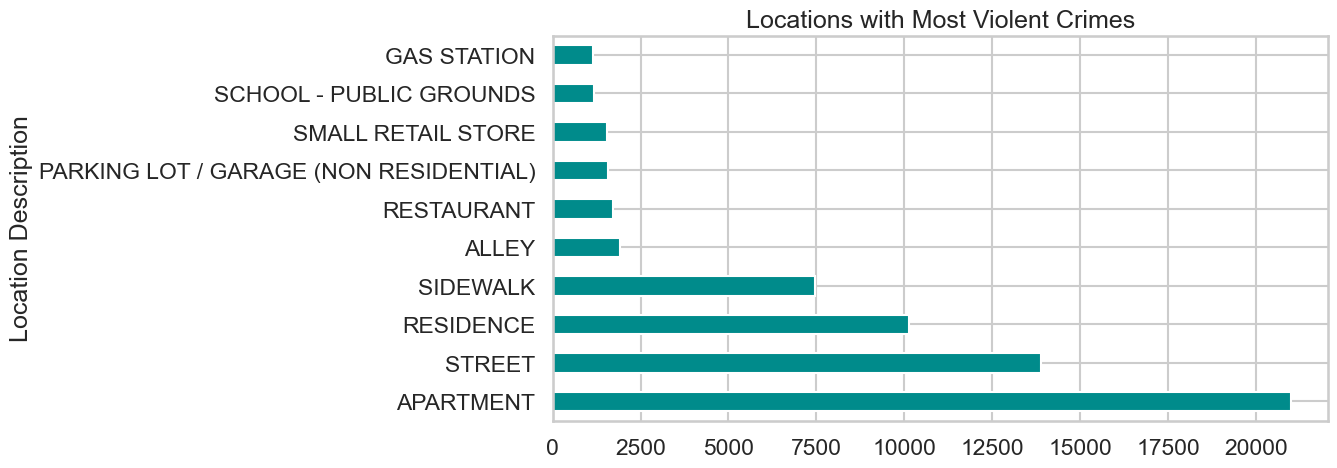

In [53]:
loc_violent = chics[chics['Violent']==True]['Location Description'].value_counts().head(10)
loc_violent.plot(kind='barh', color="darkcyan")
plt.title("Locations with Most Violent Crimes")
plt.show()

<h2>Insight: Streets, residences, and apartments dominate violent crime locations.</h2>

<h2>Q31: Are violent crimes common in residences?</h2>

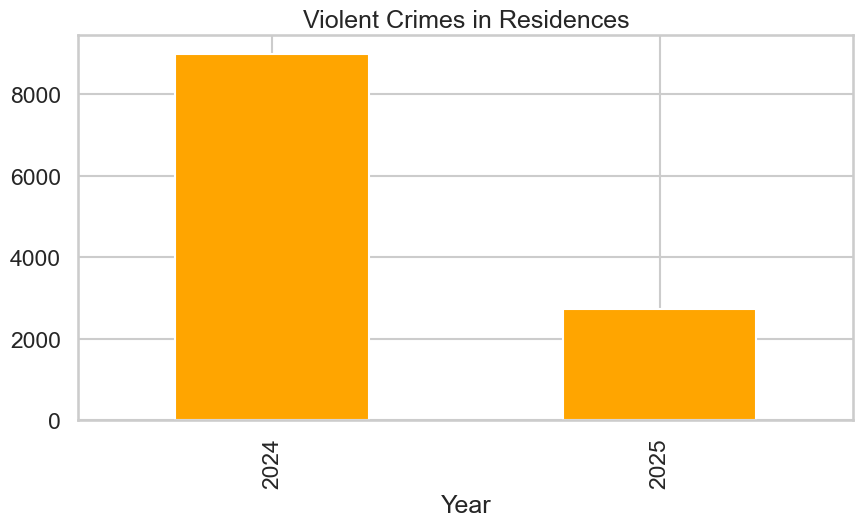

In [57]:
res_violent = chics[(chics['Violent']==True) & (chics['Location Description'].str.contains("RESIDENCE", na=False))].groupby('Year').size()
res_violent.plot(kind='bar', color="orange")
plt.title("Violent Crimes in Residences")
plt.show()


<h2>Insight: Based on graphs 2024 has the most violent crimes in residence.</h2>

<h2>Q32: When are arrests in violent crimes most likely?</h2>

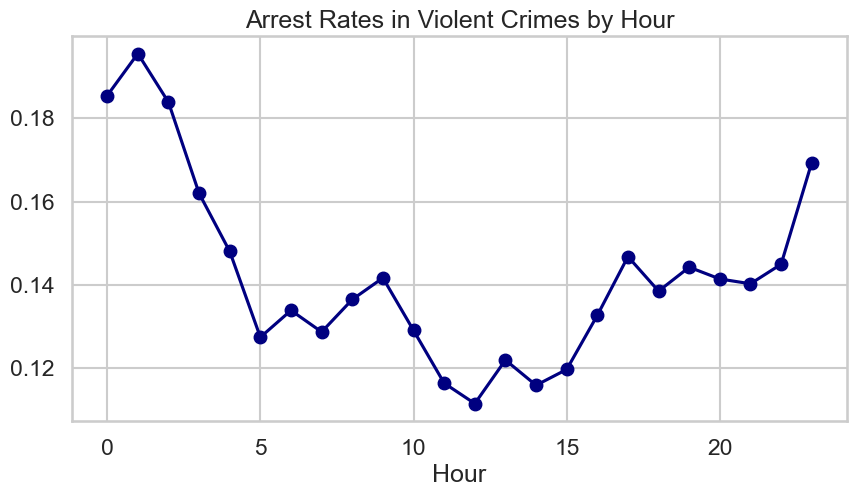

In [60]:
violent_arrest_hour = chics[chics['Violent']==True].groupby('Hour')['Arrest'].mean()
violent_arrest_hour.plot(kind='line', marker='o', color="navy")
plt.title("Arrest Rates in Violent Crimes by Hour")
plt.show()

<h2>
Insight: Arrests in violent crimes are more frequent in daytime hours.</h2>

<h2>Q33: Are violent crimes seasonal?</h2>

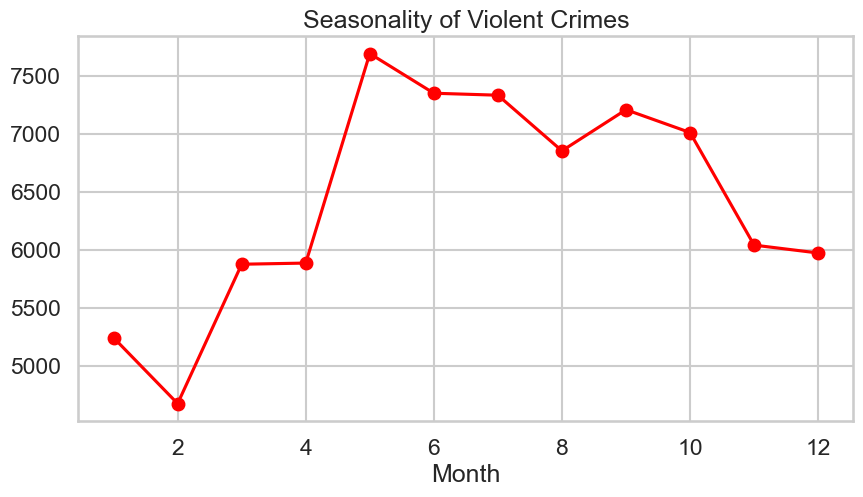

In [61]:
violent_month = chics[chics['Violent']==True].groupby('Month').size()
violent_month.plot(kind='line', marker='o', color="red")
plt.title("Seasonality of Violent Crimes")
plt.show()

<h2>
Insight: Violent crimes peak in summer months.</h2>

<h2>Q34: Which crimes have the lowest arrest success?</h2>

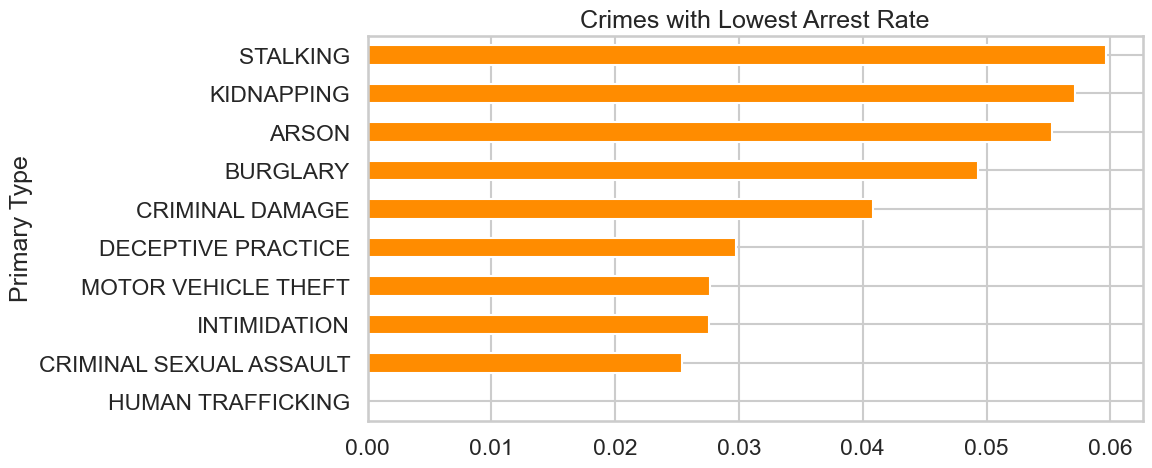

In [62]:
no_arrest = chics.groupby('Primary Type')['Arrest'].mean().sort_values().head(10)
no_arrest.plot(kind='barh', color="darkorange")
plt.title("Crimes with Lowest Arrest Rate")
plt.show()

<h2>
Insight: Criminal sexual assault and intimidation show the lowest arrest rates.</h2>

<h2>Q35: Is there a correlation between the number of arrests and total crime volume by district?</h2>

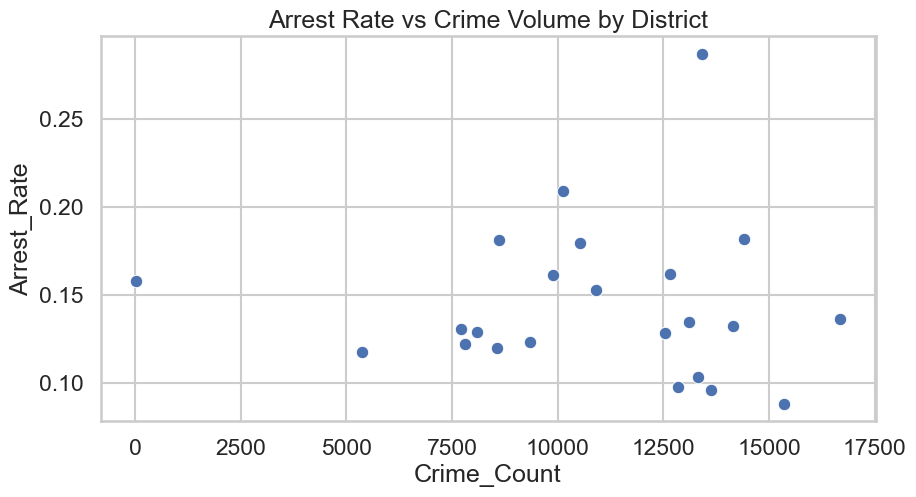

             Crime_Count  Arrest_Rate
Crime_Count     1.000000    -0.028833
Arrest_Rate    -0.028833     1.000000


In [64]:
district_corr = chics.groupby('District').agg(
    Crime_Count=('ID','count'),
    Arrest_Rate=('Arrest','mean')
)
sns.scatterplot(x='Crime_Count', y='Arrest_Rate', data=district_corr)
plt.title("Arrest Rate vs Crime Volume by District")
plt.show()
print(district_corr.corr())


<h2>Insight: Districts with higher crime counts don’t necessarily have higher arrest rates; correlation is often weak or negative, suggesting resource strain in high-crime districts.</h2>